# pyTorch tutorials
Taken from the official website.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

## Essentials
### Creating empty tensors

In [2]:
vuoto1 = torch.empty(5, 3)  # creates a 5-by-3 empty tensor
print(vuoto1)

random1 = torch.rand(5, 3)  # creates a 5-by-3 random tensor
print(random1)

zeros1 = torch.zeros(10, 2)  # creates a 10-by-2 zeroed tensor
print(zeros1)

tensor([[1.1210e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
tensor([[0.1449, 0.1475, 0.0082],
        [0.0981, 0.2574, 0.1044],
        [0.0845, 0.1505, 0.6474],
        [0.3983, 0.2397, 0.1269],
        [0.6975, 0.1572, 0.7713]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


### Constructing a tensor from data

In [3]:
# To construct a tensor from data, we can do:
from_data1 = torch.tensor([10, 20.3, 2])
print(from_data1)

# We can specify the type of data we want
from_data2 = torch.tensor([10, 20.3, 2], dtype=torch.long)
print(from_data2)

from_data3 = torch.tensor([10, 20.3, 2], dtype=torch.double)
print(from_data3)

tensor([10.0000, 20.3000,  2.0000])
tensor([10, 20,  2])
tensor([10.0000, 20.3000,  2.0000], dtype=torch.float64)


### Converting other data types to tensors

In [4]:
# Or it is possible to "convert" and reuse other tensors as well
from_data4 = from_data3.new_empty(10, 2)
print(from_data4)
from_data5 = torch.randn_like(from_data1, dtype=torch.float)
print(from_data5)

# To obtain tensor size:
print(from_data5.size())
print(from_data4.size())

tensor([[ 5.7020e-66,  4.7642e-38],
        [ 1.5192e-51, 3.4656e+179],
        [5.0116e+217, 5.4942e-143],
        [9.8006e+252, 1.0486e-142],
        [2.1403e+161, 8.0083e+165],
        [3.9706e+246,  1.1632e-28],
        [6.4885e+169, 4.3966e+175],
        [ 3.5440e-61, 6.0320e+174],
        [3.9845e+252,  3.3103e-33],
        [ 2.9999e-66,  4.0610e-86]], dtype=torch.float64)
tensor([-0.5843,  0.9068,  1.8927])
torch.Size([3])
torch.Size([10, 2])


## Operations on tensors

In [5]:
random2 = torch.randn_like(random1)
print(random1 + random2)  # Sum of tensors
print(torch.add(random1, random2))  # Another way, explicit method call
risultato_somma = torch.empty_like(random1)  # Another way, involving pre-initializing the result storage tensor
torch.add(random1, random2, out=risultato_somma)
print(risultato_somma)
random3 = torch.randn_like(random1)
random3.add_(random2)  # In place addition, will add random2 to random3, and reassign the result

# Tensors support all the NumPy-like indexing facilities:
print(random1[:, 1])

# Also to reshape, it's possible to use the torch.view() methods:
x1 = torch.randn(4, 4)  # 4 by 4 random tensor, size == 16
y1 = x1.view(16)  # now, the same elements are arranged as a 16 (by 1) tensor
z1 = x1.view(-1, 8)  # ask to put 8 elements on the second dimension and to infer how many it needs to put in the first (-1)
z2 = x1.view(-1, 2, 2)  # now let's ask to do a 3-D tensor with 2 elements on the second dimension and 2 elements on the third dimension, let's allow torch to infer how many elementds it should put on the remaining (1st) dimension
print(x1.size(), y1.size(), z1.size())
print()
print(z2, z2.size())

tensor([[ 1.4182, -1.1041,  0.5735],
        [-2.5707,  0.6771,  1.3981],
        [ 1.3407, -0.5256,  0.3019],
        [ 0.0432, -0.5630, -0.1236],
        [ 1.7823,  2.8351,  1.3126]])
tensor([[ 1.4182, -1.1041,  0.5735],
        [-2.5707,  0.6771,  1.3981],
        [ 1.3407, -0.5256,  0.3019],
        [ 0.0432, -0.5630, -0.1236],
        [ 1.7823,  2.8351,  1.3126]])
tensor([[ 1.4182, -1.1041,  0.5735],
        [-2.5707,  0.6771,  1.3981],
        [ 1.3407, -0.5256,  0.3019],
        [ 0.0432, -0.5630, -0.1236],
        [ 1.7823,  2.8351,  1.3126]])
tensor([0.1475, 0.2574, 0.1505, 0.2397, 0.1572])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])

tensor([[[-0.2837,  2.2750],
         [ 1.0101,  0.9639]],

        [[-0.4132, -0.0180],
         [-0.2878,  0.3946]],

        [[ 0.9308, -0.6259],
         [-1.1363, -1.8214]],

        [[ 1.3800,  0.7590],
         [-0.8801,  1.3607]]]) torch.Size([4, 2, 2])


The command ```torch.view()``` can be used to resize/reshape tensors (by selecting the desired elements) by asking it to 
rearrange the elements so that they fit in the requested size/dimensions.

In [6]:
# For a singleton tensor, we can get the value as a normal number with:
singleton1 = torch.randn(1)
print(singleton1)
print(singleton1.item())

tensor([-0.3983])
-0.39826226234436035


We can use the ```torch.item()``` method to extract the actual element from the tensor, as seen above.

## Numpy integration

In [7]:
a1 = torch.ones(10)
print(a1)
a1_numpy = a1.numpy()  # To convert to a NumPy array
print(a1_numpy)

# Let's see what happens with:
a1.add_(1)
print(a1)
print(a1_numpy)  # it carries the change from the tensor to the NumPy array

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


Any operator which mutates directly the original variable (like in the example above) is post-fixed with a "_" symbol.

In [8]:
# And the contrary is doable, too
numpy_a1 = np.ones(10)
from_numpy_a1 = torch.from_numpy(numpy_a1)
np.add(numpy_a1, 1, out=numpy_a1)
print(numpy_a1)
print(from_numpy_a1)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA tensors
To take advantage of a GPU with CUDA support, we should "address" the tensors to the correct device, like shown below. 

In [9]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x1, device=device)  # directly create a tensor on GPU
    x1 = x1.to(device)                       # or just use strings ``.to("cuda")``
    z = x1 + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!
else:
    print("CUDA not available on this machine/setup")

CUDA not available on this machine/setup


# Autograd: automatic differentiation
By setting a tensor's attribute ```.required_grad``` as ```True```, the operations done on the tensor will be tracked 
automatically. To halt the tracking, we can call the ```.detach()``` method and future operations on the tensor will not
be tracked. To temporarily perform untracked operations on a tensor that is being tracked, we can wrap the computations
within a ```with torch.no_grad():``` block.
Every tensor has a a reference to a function that has created the tensor, ```.grad_fn``` (except for user-made tensors, 
whose ```grad_fn``` is ```None```.
All of this has to do with the fact that we are trying to find the optimal weights for several layers of neurons. In order
to efficiently do this, **the cost function needs to be properly back-propagated from the output layer all the way to the
input**. Automatic differentiation is an efficient algorithm to perform this task, and keeping track of every operation
performed on our tensors is essential for it to work properly.
Let's try this.

In [10]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
# Let's perform an operation on this tensor.
y = x + 2
print(y)
# Given that the tensor y was created through an operation, it has a grad_fn attached.
print(y.grad_fn)
print(x.grad_fn)  # But a user-made tensor, on the other hand, has None as it's grad_fn
z = y * y * 3
out = z.mean()
print(x, out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
None
tensor([[1., 1.],
        [1., 1.]], requires_grad=True) tensor(27., grad_fn=<MeanBackward0>)


# Neural Networks
The ```nn``` module depends on ```autograd``` to define models and differentiate them. This module's purpose is to contain
layers and a method ```forward(input)``` that returns the ```output```.
Let's now define an example neural network (```convnet``` I think, used to classify handwritten digits?).

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # This network takes 1 input image channel, has 6 output channels and a 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        # Don't have clues about this. Maybe it's just me?
        
    def forward(self, x):
        # Max pooling over a (2, 2) window, they say
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square we can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


This defines the architecture of the net. We have to define the ```forward``` function, while the ```backward``` function will be 
automatically defined by ```autograd```.
We can then obtain the list of learnable parameters using the following syntax:

In [12]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


Now let's try a random 32x32 input. This net expects an input size of 32x32.

In [13]:
my_input = torch.randn(1, 1, 32, 32)
out = net(my_input)
print(out)

net.zero_grad()  # Let's zero the gradient buffers
out.backward(torch.randn(1, 10))  # and reset the backprops randomly

tensor([[ 0.0819,  0.0214, -0.0185, -0.0544,  0.0939,  0.1009,  0.0674,  0.0460,
         -0.0195,  0.0195]], grad_fn=<AddmmBackward>)


## Recap
* ```torch.Tensor``` is a multi-dimensional array supporting ```autograd``` operations like ```backwards()```; it also 
**holds the gradient** with regard to the tensor itself.
* ```(torch.)nn.Module``` contains the neural network module, convenient way of encapsulating the parameters with various
helpers.
* ```(torch.)nn.Parameter``` is a kind of tensor automatically registered as a parameter when assigned as an attribute
to a module.
* ```autograd.Function``` implements ```forward``` and ```backward``` definitions of an autograd operation. Every tensor
operation creates at least a single function node that connects to functions that created a tensor and encodes its history.
operation creates at least a single function node that connects to functions that created a tensor and encodes its history.

# Loss Function
A loss function takes a (output, target) pair of inputs and computes a value that estimates how far away the output is
from the target. The package ```nn``` contains several different loss functions: a simple loss is ```nn.MSELoss``` which
computes the mean-squared error between the input and the target.
Example:

In [14]:
output = net(my_input)
target = torch.randn(10)  # dummy target
target = target.view(1, -1)  # make it the same shape as the output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6112, grad_fn=<MseLossBackward>)


If we followed loss in the ```backward``` direction using its ```.grad_fn``` attribute, we will walk through a graph of 
all the computations from ```input``` to ```loss``` (the last being performed). Something similar to:

```input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss```

When calling ```loss.backward()```, the whole graph is differentiated with regard to the ```loss``` and all the tensors 
in the graph that have ```requires_grad=True``` will have their ```.grad``` tensor accumulated with the gradient. Let's
try this:

In [15]:
print(loss.grad_fn)  # this would be MSELoss
print(loss.grad_fn.next_functions[0][0])  # this would be Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # and this would be reLU

# Backprop
In order to backpropagate the error, we just have to call ```loss.backwards()```.

In [16]:
net.zero_grad()  # Let's zero all the gradients again

print("conv1.bias.grad before backward")
print(net.conv1.bias.grad)

loss.backward()

print("conv1.bias.grad after backward")
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0026, -0.0004,  0.0101, -0.0041,  0.0033,  0.0069])


# Updating the weights
Now that we have computed the loss function, we can deal with how to update the weights. The simplest update rule
in practice is the **Stochastic Gradient Descent (SGD)**:
```weight = weight - learning_rate * gradient```. Let's try this.

In [17]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

This works, but several other update rules (such as SGD, Nesterov-SGD, Adam, RMSProp) are included in the ```torch.optim```
package. Let's try.

In [18]:
# Let's create an optimizer!
optimizer = optim.SGD(net.parameters(), lr=0.01)

# And then we would put the following in our training loop:
optimizer.zero_grad()
output = net(my_input)
loss = criterion(output, target)
loss.backward()
optimizer.step()  # Actual update

# Training a classifier
While data is data, and as such it can be manipulated with any suitable tool (i.e. Pillow, OpenCV for images, scipy and 
librosa for audio, raw Python, NLTK or SpaCy for text), a few helper packages are offered within torch, such as the
**torchvision** package.

In this tutorial we will use the ```CIFAR10``` dataset, containing 32x32 images in the following classes: airplane,
automobile, bird, cat, deer, dog, frog, horse, ship, truck.
The step of what is needed to do are:
1. Load and normalize the CIFAR1- training and test datasets using ```torchvision```
2. Define a **Convolutional Neural Network**
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

## 1. Loading and normalizing CIFAR10

Files already downloaded and verified
Files already downloaded and verified
 grog   cat horse  grog


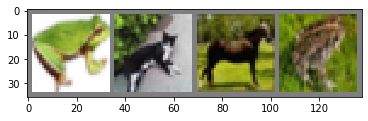

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ("plane", "car", "bird", "cat", "deer", "dog", "grog", "horse", "ship", "truck")

# Let's see some of the images.
def imshow(img):
    img = img / 2 + 0.5  # Un-normalize (???)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# Let's get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show the images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

## 2. Define a Convolutional Neural Network
We will use the architecture presented above, modified to take the correct number of channels.

In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

## 3. Define a Loss function and optimizer
For this example, we will be using a Classification Cross-Entropy loss and SGD with momentum.

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## 4. Train the network
We will now loop over our data iterator and feed the inputs to the network, and optimize.

In [22]:
for epoch in range(2):  # iterate over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches (what are these anyways??)
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished training.')

[1,  2000] loss: 2.273
[1,  4000] loss: 1.905
[1,  6000] loss: 1.661
[1,  8000] loss: 1.558
[1, 10000] loss: 1.519
[1, 12000] loss: 1.475
[2,  2000] loss: 1.399
[2,  4000] loss: 1.354
[2,  6000] loss: 1.304
[2,  8000] loss: 1.312
[2, 10000] loss: 1.283
[2, 12000] loss: 1.268
Finished training.


In [23]:
# Let's save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## 5. Test the network on the test data
Now let's see how our network performs with images it never saw.

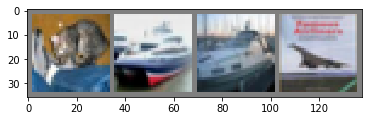

GroundTruth:    cat  ship  ship plane


In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Now, let's load our saved model.

In [26]:
net = Net()
net.load_state_dict(torch.load(PATH))
# Let's now see how the network performs on the images presented above
outputs = net(images)  # The outputs are energies for the 10 classes. The higher the energy for a class, the more the network is convinced that the image belongs to that particular class.
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship plane  ship


In [27]:
# Let's now see how it performs on the whole test dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [28]:
# Let's now examine which classes provoke performed well and the ones that did not
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
    

Accuracy of plane : 60 %
Accuracy of   car : 65 %
Accuracy of  bird : 48 %
Accuracy of   cat : 18 %
Accuracy of  deer : 64 %
Accuracy of   dog : 61 %
Accuracy of  grog : 63 %
Accuracy of horse : 53 %
Accuracy of  ship : 76 %
Accuracy of truck : 59 %


## Training on GPU
When a CUDA-compatible GPU is available, we can easily move everything over to it to speed things up.

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)  # send the net itself to the GPU
inputs, labels = data[0].to(device), data[1].to(device)  # We need to send the inputs and targets for the every step to the GPU, too


cpu
